In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xlrd
from datetime import datetime 

In [6]:
pip install matplotlib --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
Cab = pd.read_csv('Cab_Data.csv')
Cab.isnull().sum()
for i in range(len(Cab['Date of Travel'])):
   Cab['Date of Travel'][i] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + Cab['Date of Travel'][i] +  - 2).strftime("%d-%m-%y")
#So from output we can say in Cab_Data.csv there is no null values.
City = pd.read_csv('City.csv')
City.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


City          0
Population    0
Users         0
dtype: int64

In [8]:
Customer = pd.read_csv('Customer_ID.csv')
Customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [9]:
Transaction = pd.read_csv('Transaction_ID.csv')
Transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

merge all data....................

In [10]:
Data = Cab.merge(Transaction,on = 'Transaction ID').merge(Customer,on = 'Customer ID').merge(City,on = 'City')
Data['Population'] = Data['Population'].replace(',','')

convert Datatypes of Data so we can easily use data into models

In [11]:
Data['Population']=Data['Population'].str.replace(',','')
Data['Users']=Data['Users'].str.replace(',','')

In [12]:
Data['Population']=Data['Population'].astype('int64')
Data['Users']=Data['Users'].astype('int64')
for col in ['Gender', 'Payment_Mode', 'City', 'Company']:
    Data[col] = Data[col].astype('category')

In [13]:
Data['Date of Travel'] = pd.to_datetime(Data['Date of Travel'])
Data['Profit'] = Data['Price Charged'] - Data['Cost of Trip']

create hist_plot.....(for KM,Price,Cost)

<AxesSubplot:xlabel='Cost of Trip', ylabel='Count'>

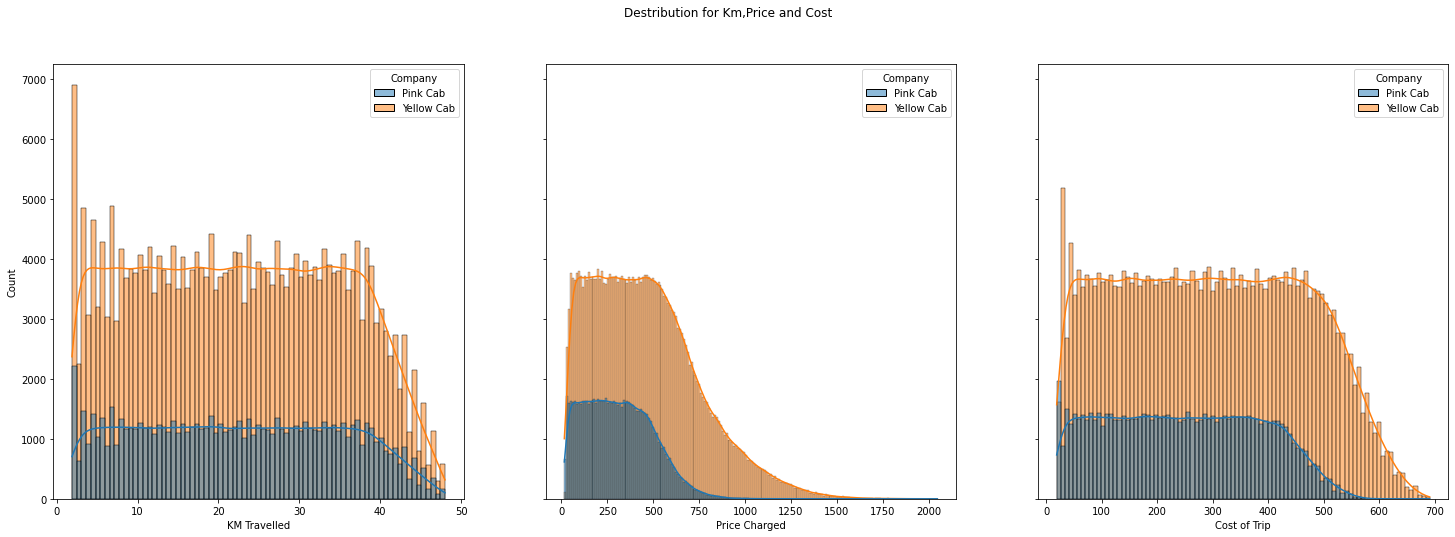

In [14]:
fig,axes = plt.subplots(1, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Destribution for Km,Price and Cost')
sns.histplot(ax = axes[0],data = Data,x = 'KM Travelled',hue='Company',kde=True)
sns.histplot(ax = axes[1],data = Data,x = 'Price Charged',hue='Company',kde=True)
sns.histplot(ax = axes[2],data = Data,x = 'Cost of Trip',hue='Company',kde=True)






<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Count'>

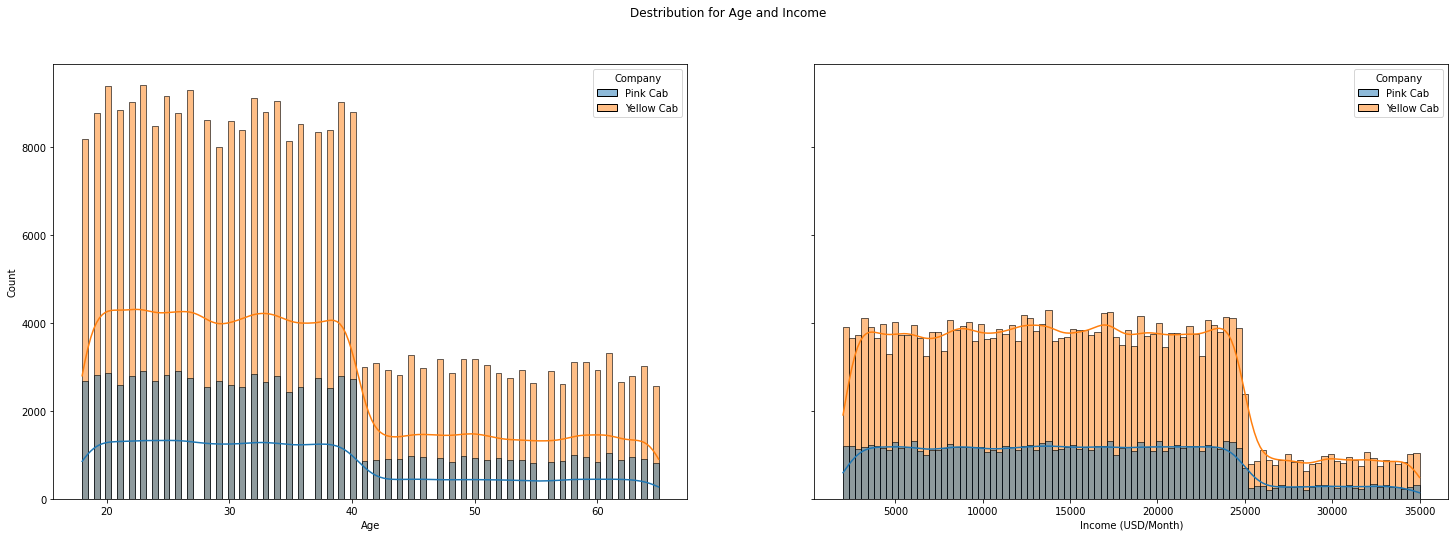

In [15]:
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Destribution for Age and Income')
sns.histplot(ax = axes[0],data = Data,x = 'Age',hue='Company',kde=True)
sns.histplot(ax = axes[1],data = Data,x = 'Income (USD/Month)',hue='Company',kde=True)

<AxesSubplot:xlabel='Population', ylabel='Count'>

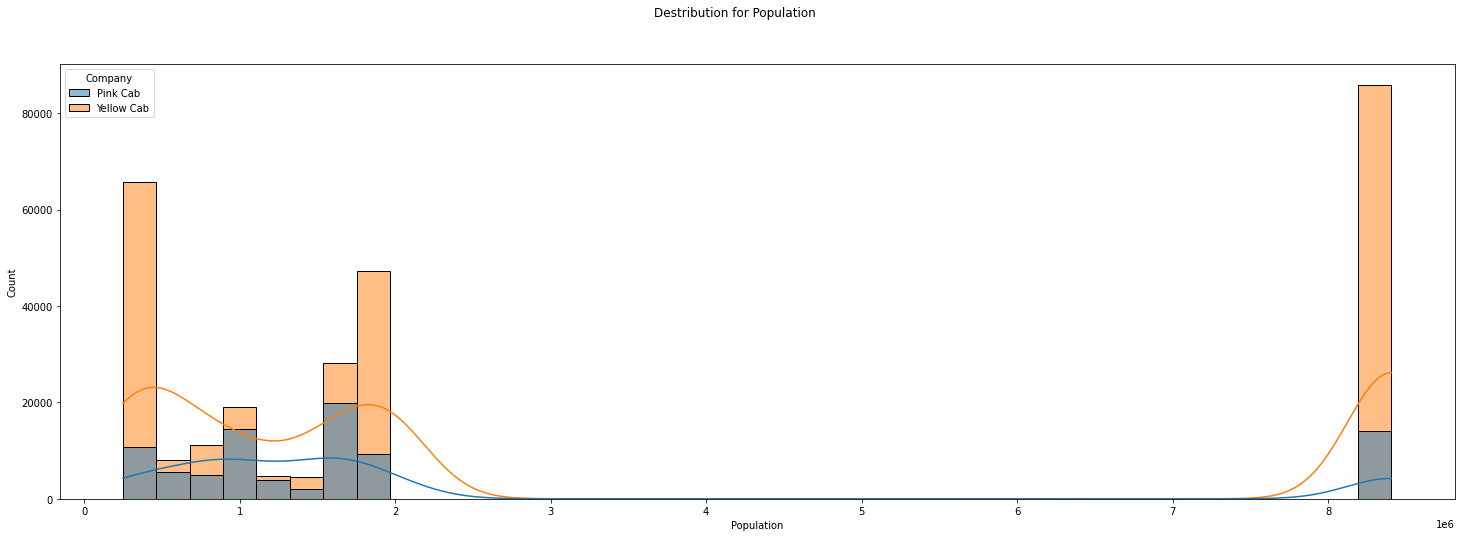

In [16]:
fig,axes = plt.subplots(1, 1, figsize=(25, 8), sharey=True)
fig.suptitle('Destribution for Population')
sns.histplot(data = Data,x = 'Population',hue='Company',kde=True)

<AxesSubplot:xlabel='Users', ylabel='Count'>

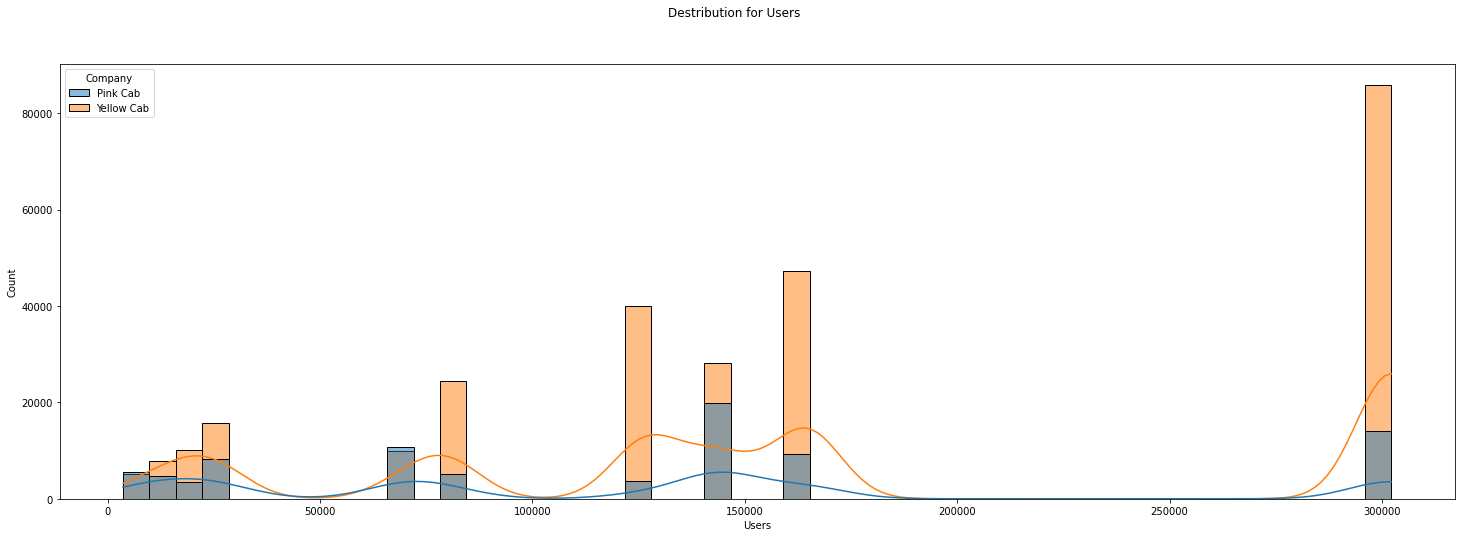

In [17]:
fig,axes = plt.subplots(1, 1, figsize=(25, 8), sharey=True)
fig.suptitle('Destribution for Users')
sns.histplot(data = Data,x = 'Users',hue='Company',kde=True)

<AxesSubplot:xlabel='Profit', ylabel='Count'>

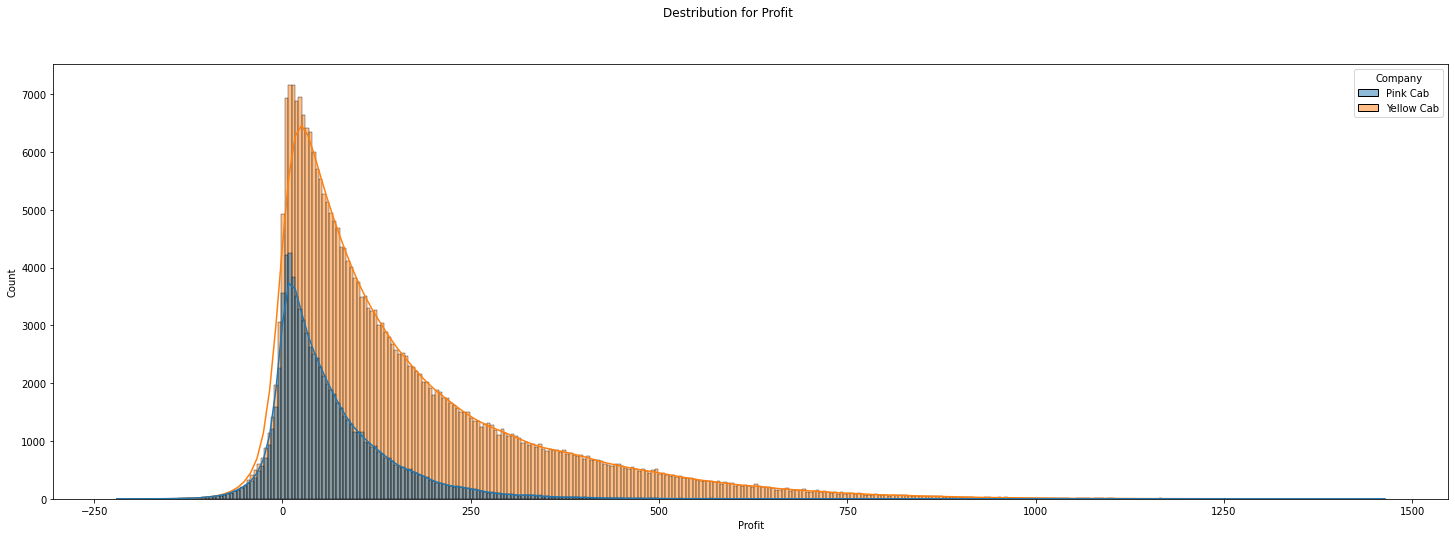

In [18]:
fig,axes = plt.subplots(1, 1, figsize=(25, 8), sharey=True)
fig.suptitle('Destribution for Profit')
sns.histplot(data = Data,x = 'Profit',hue='Company',kde=True)

create hist_plot.....(for Age,Income)

Devide data according to company and used selected columns

In [19]:
Yellow_cab = Data[Data['Company'] == 'Yellow Cab']
Pink_cab = Data[Data['Company'] == 'Pink Cab']

In [20]:
selected_columns = ['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)', 'Population' , 'Users']

find stat_infos.........

In [21]:
Yellow_cab_info = Yellow_cab[selected_columns]
Yellow_Cab_statinfo = Yellow_cab_info.describe()

In [22]:
Pink_cab_info = Pink_cab[selected_columns]
Pink_Cab_statinfo = Pink_cab_info.describe()

perform NA_Values.......

In [23]:
Yellow_NA = Yellow_cab_info.info()
Pink_NA = Pink_cab_info.info()
#Here The output shows there is not null values....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 1 to 359391
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   KM Travelled        274681 non-null  float64
 1   Price Charged       274681 non-null  float64
 2   Cost of Trip        274681 non-null  float64
 3   Age                 274681 non-null  int64  
 4   Income (USD/Month)  274681 non-null  int64  
 5   Population          274681 non-null  int64  
 6   Users               274681 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 16.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 359363
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KM Travelled        84711 non-null  float64
 1   Price Charged       84711 non-null  float64
 2   Cost of Trip        84711 non-null  float64
 3   Age                 84711 non-

for finding Outliers we need Box plots(For Visulization of outliers) and IQR value.....

it will remove Outliers

In [26]:
Q1 = Yellow_cab_info.quantile(0.25)
Q3 = Yellow_cab_info.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Yellow_cab_info = Yellow_cab_info[~((Yellow_cab_info < (Q1 - 1.5 * IQR)) |(Yellow_cab_info > (Q3 + 1.5 * IQR))).any(axis=1)]
Yellow_cab_info.shape


KM Travelled               20.970
Price Charged             407.200
Cost of Trip              274.032
Age                        17.000
Income (USD/Month)      12584.000
Population            7734599.000
Users                  222128.000
dtype: float64


(271441, 7)

In [27]:
#For finding Outliers we need Box plots(For Visulization of outliers) and IQR value.....
Q1 = Pink_cab_info.quantile(0.25)
Q3 = Pink_cab_info.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#It will remove Outliers
Pink_cab_info = Pink_cab_info[~((Pink_cab_info < (Q1 - 1.5 * IQR)) |(Pink_cab_info > (Q3 + 1.5 * IQR))).any(axis=1)]
Pink_cab_info.shape

KM Travelled               20.960
Price Charged             281.535
Cost of Trip              228.312
Age                        17.000
Income (USD/Month)      12684.000
Population            1140245.000
Users                  137221.000
dtype: float64


(70632, 7)

box_plot.........

Text(0, 0.5, 'Yellow_cab')

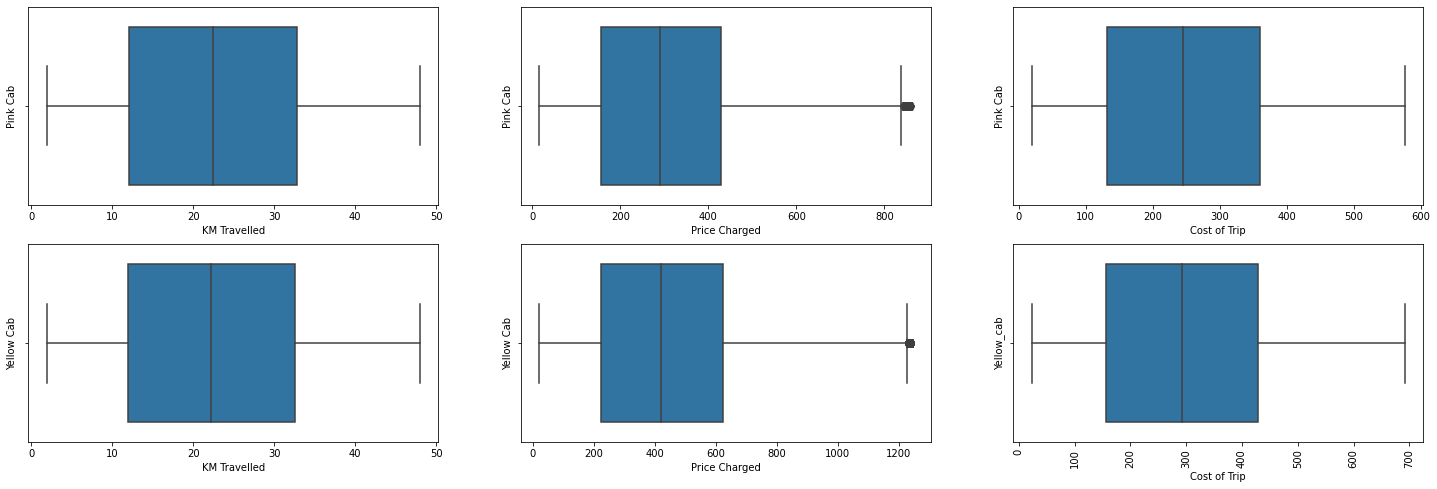

In [28]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
sns.boxplot(ax = axes[0,0],x='KM Travelled',data=Pink_cab_info).set_ylabel("Pink Cab")
plt.xticks(rotation=90)
plt.ylabel('Pink_cab')
sns.boxplot(ax = axes[0,1],x='Price Charged',data=Pink_cab_info).set_ylabel("Pink Cab")
plt.xticks(rotation=90)
plt.ylabel('Pink_cab')
sns.boxplot(ax = axes[0,2],x='Cost of Trip',data=Pink_cab_info).set_ylabel("Pink Cab")
plt.xticks(rotation=90)
plt.ylabel('Pink_cab')
sns.boxplot(ax = axes[1,0],x='KM Travelled',data=Yellow_cab_info).set_ylabel("Yellow Cab")
plt.xticks(rotation=90)
plt.ylabel('Yellow_cab')
sns.boxplot(ax = axes[1,1],x='Price Charged',data=Yellow_cab_info).set_ylabel("Yellow Cab")
plt.xticks(rotation=90)
plt.ylabel('Yellow_cab')
sns.boxplot(ax = axes[1,2],x='Cost of Trip',data=Yellow_cab_info).set_ylabel("Yellow Cab")
plt.xticks(rotation=90)
plt.ylabel('Yellow_cab')

Text(0, 0.5, 'Yellow_Cab')

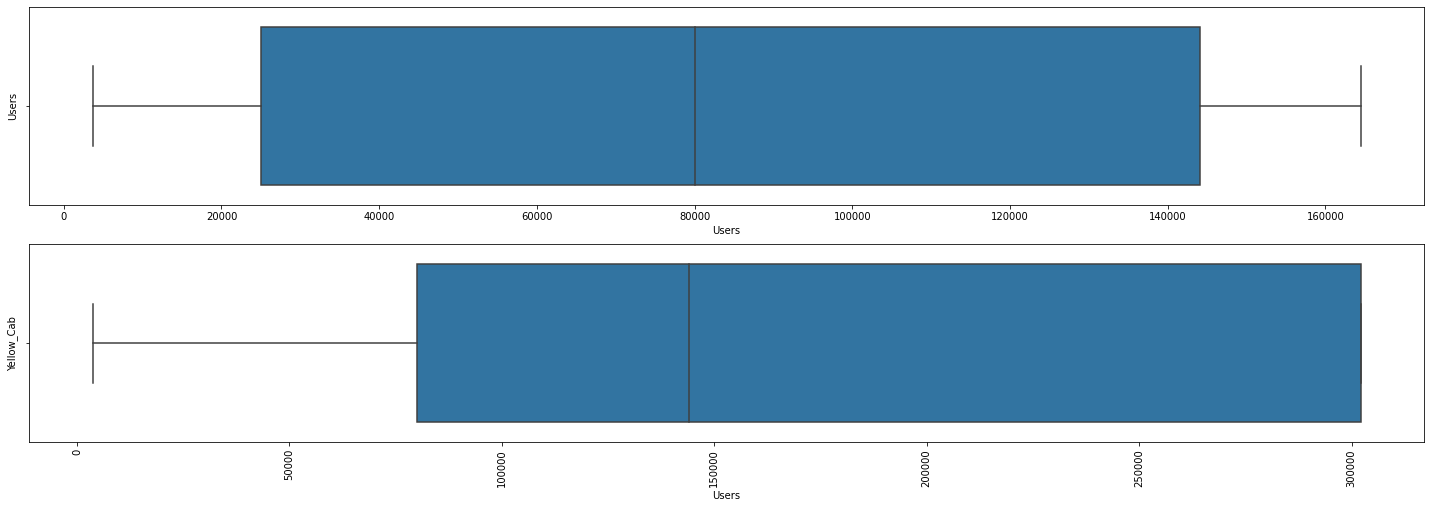

In [29]:
fig,axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.boxplot(ax = axes[0],x='Users',data=Pink_cab_info).set_ylabel("Users")
plt.xticks(rotation=90)
plt.ylabel('Pink_Cab')
sns.boxplot(ax = axes[1],x='Users',data=Yellow_cab_info).set_ylabel("Users")
plt.xticks(rotation=90)
plt.ylabel('Yellow_Cab')


Text(0, 0.5, 'Yellow_Cab')

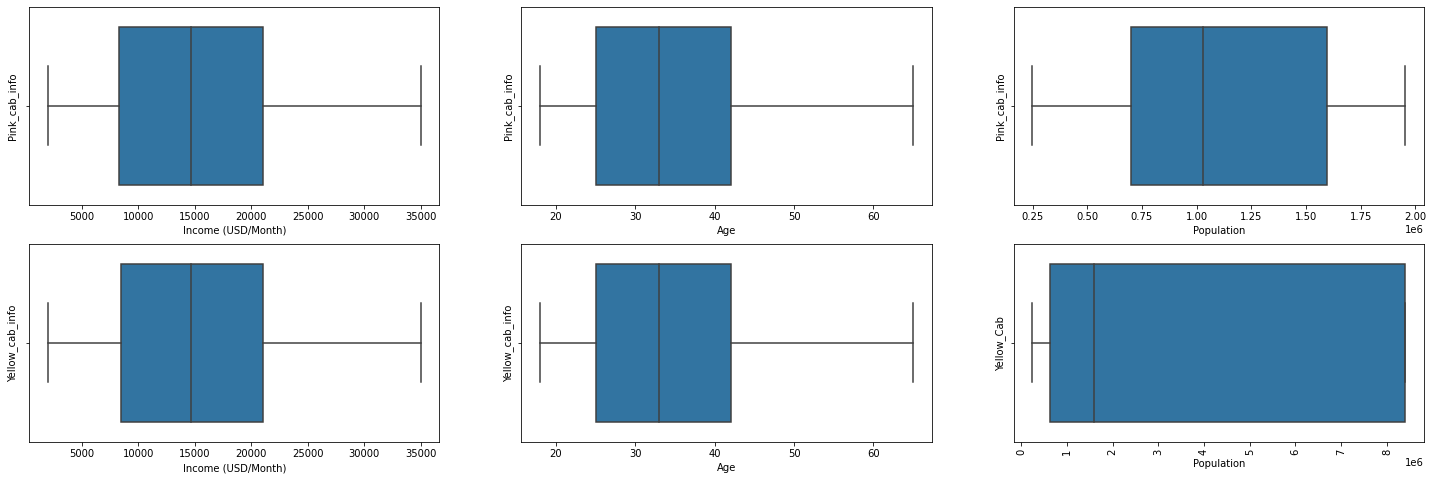

In [30]:
fig,axes = plt.subplots(2,3, figsize=(25, 8), sharey=True)
sns.boxplot(ax = axes[0,0],x='Income (USD/Month)',data=Pink_cab_info).set_ylabel("Pink_cab_info")
plt.xticks(rotation=90)
plt.ylabel('Pink_Cab')
sns.boxplot(ax = axes[0,1],x='Age',data=Pink_cab_info).set_ylabel("Pink_cab_info")
plt.xticks(rotation=90)
plt.ylabel('Pink_Cab')
sns.boxplot(ax = axes[0,2],x='Population',data=Pink_cab_info).set_ylabel("Pink_cab_info")
plt.xticks(rotation=90)
plt.ylabel('Pink_Cab')
sns.boxplot(ax = axes[1,0],x='Income (USD/Month)',data=Yellow_cab_info).set_ylabel("Yellow_cab_info")
plt.xticks(rotation=90)
plt.ylabel('Yellow_Cab')
sns.boxplot(ax = axes[1,1],x='Age',data=Yellow_cab_info).set_ylabel("Yellow_cab_info")
plt.xticks(rotation=90)
plt.ylabel('Yellow_Cab')
sns.boxplot(ax = axes[1,2],x='Population',data=Yellow_cab_info).set_ylabel("Yellow_cab_info")
plt.xticks(rotation=90)
plt.ylabel('Yellow_Cab')

In [31]:
columns1 = ['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)', 'Population' , 'Users']
columns2 = ['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)', 'Population' , 'Users']

In [32]:
for i in columns1:
    for j in columns2:
        corr = Data[i].corr(Data[j])
        print ("Correlation between ", i, " and ", j, "is: ", round(corr, 2))

Correlation between  KM Travelled  and  KM Travelled is:  1.0
Correlation between  KM Travelled  and  Price Charged is:  0.84
Correlation between  KM Travelled  and  Cost of Trip is:  0.98
Correlation between  KM Travelled  and  Age is:  -0.0
Correlation between  KM Travelled  and  Income (USD/Month) is:  -0.0
Correlation between  KM Travelled  and  Population is:  -0.0
Correlation between  KM Travelled  and  Users is:  -0.0
Correlation between  Price Charged  and  KM Travelled is:  0.84
Correlation between  Price Charged  and  Price Charged is:  1.0
Correlation between  Price Charged  and  Cost of Trip is:  0.86
Correlation between  Price Charged  and  Age is:  -0.0
Correlation between  Price Charged  and  Income (USD/Month) is:  0.0
Correlation between  Price Charged  and  Population is:  0.33
Correlation between  Price Charged  and  Users is:  0.28
Correlation between  Cost of Trip  and  KM Travelled is:  0.98
Correlation between  Cost of Trip  and  Price Charged is:  0.86
Correlati


From this output we can say that correlation between (KM Travelled,Price charged),<br>
(Price charged,Cost of Trip),(cost of Trip,KM Travelled) and (Population,Users)<br>
 possitive


bar chart for City and Company(Yellow Cab)

In [33]:
City1 = Data[Data['Company'] == 'Yellow Cab'].groupby('City').count()

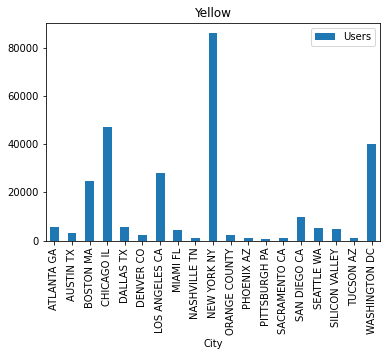

In [34]:
City1.groupby(['City']).sum().plot(
    kind='bar', y='Users')
plt.title('Yellow')
#Bar chart for City and Company(Pink Cab)
City2 = Data[Data['Company'] == 'Pink Cab'].groupby('City').count()

<AxesSubplot:title={'center':'Pink_cab'}, xlabel='City'>

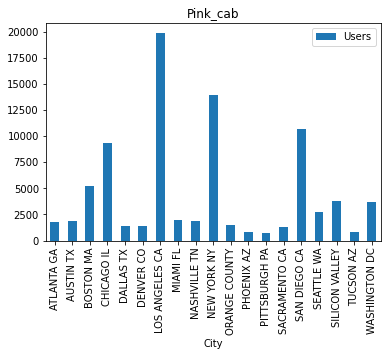

In [35]:
City2.groupby(['City']).sum().plot(
    kind='bar', y='Users',title = 'Pink_cab')

from This Bar chat we can say which company has maximum users in which City

In [36]:
Yellow_cab_info1 = Yellow_cab[['Date of Travel','Users']]

In [37]:
Time_1_Yellow = Yellow_cab_info1.groupby(pd.Grouper(key='Date of Travel', axis=0, 
                      freq='m')).sum()
Time_1_Yellow = Time_1_Yellow.head(30)
Time_1_Yellow['Yellow_Users'] = Time_1_Yellow['Users']
Time_1_Yellow.drop('Users',axis = 1)

,Yellow_Users
Date of Travel,
2016-01-31,790224859
2016-02-29,924527849
2016-03-31,1001854376
2016-04-30,960226221
2016-05-31,1062142711
2016-06-30,988447119
2016-07-31,1143963954
2016-08-31,1147211916
2016-09-30,1233908043


In [38]:
Pink_cab_info1 = Pink_cab[['Date of Travel','Users']]

In [39]:
Time_1_Pink = Pink_cab_info1.groupby(pd.Grouper(key='Date of Travel', axis=0, 
                      freq='D')).sum()
Time_1_Pink['Pink_Users'] = Time_1_Pink['Users']
Time_1_Pink.drop('Users',axis = 1)

,Pink_Users
Date of Travel,
2016-01-02,1351901
2016-01-03,2383666
2016-01-04,3484365
2016-01-05,8622708
2016-01-06,3596738
...,...
2018-12-27,8417115
2018-12-28,27753299
2018-12-29,24359877


In [40]:
Time_stamp = Time_1_Pink.merge(Time_1_Yellow,on = 'Date of Travel')
Time_1 = Time_stamp.drop('Users_x',axis = 1)
Time = Time_1.drop('Users_y',axis = 1)

here Time Data shows which company has maximum cab users at a Perticular Time Period

2nd Question.............................................................<br>
we need to find Margin first<br>
so Margin = Price charged - Cost of trip

In [41]:
Data['Margin'] = Data['Price Charged'] - Data['Cost of Trip']
Ratio = Data[['Margin','Users']]
Margin = []
mean1 = Ratio['Margin'][Ratio['Users'] == 302149].mean()
Margin.append(mean1)
mean2 = Ratio['Margin'][Ratio['Users'] == 164468].mean()
Margin.append(mean2)
mean3 = Ratio['Margin'][Ratio['Users'] == 144132].mean()
Margin.append(mean3)
mean4 = Ratio['Margin'][Ratio['Users'] == 127001].mean()
Margin.append(mean4)
mean5 = Ratio['Margin'][Ratio['Users'] == 80021].mean()
Margin.append(mean5)
mean6 = Ratio['Margin'][Ratio['Users'] == 69995].mean()
Margin.append(mean6)
mean7 = Ratio['Margin'][Ratio['Users'] == 27247].mean()
Margin.append(mean7)
mean8 = Ratio['Margin'][Ratio['Users'] == 25063].mean()
Margin.append(mean8)
mean9 = Ratio['Margin'][Ratio['Users'] == 24701].mean()
Margin.append(mean9)
mean10 = Ratio['Margin'][Ratio['Users'] == 22157].mean()
Margin.append(mean10)
mean11 = Ratio['Margin'][Ratio['Users'] == 17675].mean()
Margin.append(mean11)
mean12 = Ratio['Margin'][Ratio['Users'] == 14978].mean()
Margin.append(mean12)
mean13 = Ratio['Margin'][Ratio['Users'] == 12994].mean()
Margin.append(mean13)
mean14 = Ratio['Margin'][Ratio['Users'] == 12421].mean()
Margin.append(mean14)
mean15 = Ratio['Margin'][Ratio['Users'] == 9270].mean()
Margin.append(mean15)
mean16 = Ratio['Margin'][Ratio['Users'] == 7044].mean()
Margin.append(mean16)
mean17 = Ratio['Margin'][Ratio['Users'] == 6133].mean()
Margin.append(mean17)
mean18 = Ratio['Margin'][Ratio['Users'] == 5712].mean()
Margin.append(mean18)
mean19 = Ratio['Margin'][Ratio['Users'] == 3643].mean()
Margin.append(mean19)
List = [302149,164468,144132,127001,80021,69995,27247,25063,24701,22157,17675,14978,12994,12421,9270,7044,6133,5712,3643]
data_tuples = list(zip(List,Margin))
Propotionallity = pd.DataFrame(data_tuples, columns=['Users','Margin'])

adding Profit Column

In [42]:
Data['Profit'] = Data['Price Charged'] - Data['Cost of Trip']
Data = Data.drop('Price Charged',axis = 1)
Data = Data.drop('Cost of Trip',axis = 1)
Data = Data.drop('Margin',axis = 1)
#PROFIT#....................................................
Yellow_cab = Data[Data['Company'] == 'Yellow Cab']
selected_columns_1 = ['Date of Travel','KM Travelled','Gender','Age' ,'Income (USD/Month)', 'Population' , 'Users','Profit']
Yellow_cab_profit = Yellow_cab[selected_columns_1]
Total_ride_Yellow_Cab = len(Yellow_cab_profit)
Total_profit_yellow_cab = Yellow_cab_profit['Profit'].sum()
Profit_per_ride_Yellow_Cab = Total_profit_yellow_cab/Total_ride_Yellow_Cab
Profit_per_year_Yellow_Cab = Yellow_cab_profit.groupby(pd.Grouper(key='Date of Travel', axis=0, 
                      freq='y')).sum()
# Here we can find per ride profit of yellow cab is 160.25

In [43]:
Pink_cab = Data[Data['Company'] == 'Pink Cab']
Pink_cab_profit = Pink_cab[selected_columns_1]
Total_ride_Pink_Cab = len(Pink_cab_profit)
Total_profit_Pink_cab = Pink_cab_profit['Profit'].sum()
Profit_per_ride_Pink_Cab = Total_profit_Pink_cab/Total_ride_Pink_Cab
Profit_per_year_Pink_Cab = Pink_cab_profit.groupby(pd.Grouper(key='Date of Travel', axis=0, 
                      freq='y')).sum()
# Here we can find per ride profit of pinkcab is 62.65

so from here we can conclude that per ride profit of yellow cab is better than Pink cab<br>
rofit Analysis Genderwise...................................

In [44]:
Profit_Yellow_Gender = Yellow_cab[['Date of Travel','Gender','Profit']]
Male_Profit_Yellow = Profit_Yellow_Gender[Profit_Yellow_Gender['Gender'] == 'Male']
Male_Profit_Yellow_Year = Male_Profit_Yellow.groupby(pd.Grouper(key='Date of Travel', axis=0, 
                      freq='y')).sum()
Male_Profit_Yellow_Year['Male_Profit_Percentage'] = Male_Profit_Yellow_Year['Profit']/Profit_per_year_Yellow_Cab['Profit']*100
Male_Profit_Yellow_Year['Male_Profit'] = Male_Profit_Yellow_Year['Profit'] 
Male_Profit_Yellow_Year = Male_Profit_Yellow_Year.drop('Profit',axis =1)
#Here I found Yellow company Profit per year according to male Gender
Female_Profit_Yellow = Profit_Yellow_Gender[Profit_Yellow_Gender['Gender'] == 'Female']
Female_Profit_Yellow_Year = Female_Profit_Yellow.groupby(pd.Grouper(key='Date of Travel', axis=0, 
                      freq='y')).sum()
Female_Profit_Yellow_Year['Female_Profit_Percentage'] = Female_Profit_Yellow_Year['Profit']/Profit_per_year_Yellow_Cab['Profit']*100
Female_Profit_Yellow_Year['Female_Profit'] = Female_Profit_Yellow_Year['Profit'] 
Female_Profit_Yellow_Year = Female_Profit_Yellow_Year.drop('Profit',axis =1)
#Here I found Yellow company Profit per year according to Female Gender

In [45]:
Profit_Pink_Gender = Pink_cab[['Date of Travel','Gender','Profit']]
Male_Profit_Pink = Profit_Pink_Gender[Profit_Pink_Gender['Gender'] == 'Male']
Male_Profit_Pink_Year = Male_Profit_Pink.groupby(pd.Grouper(key='Date of Travel', axis=0, 
                      freq='y')).sum()
Male_Profit_Pink_Year['Male_Profit_Percentage'] = Male_Profit_Pink_Year['Profit']/Profit_per_year_Pink_Cab['Profit']*100
Male_Profit_Pink_Year['Male_Profit'] = Male_Profit_Pink_Year['Profit'] 
Male_Profit_Pink_Year = Male_Profit_Pink_Year.drop('Profit',axis =1)
#Here I found Pink company Profit per year according to male Gender
Female_Profit_Pink = Profit_Pink_Gender[Profit_Pink_Gender['Gender'] == 'Female']
Female_Profit_Pink_Year = Female_Profit_Pink.groupby(pd.Grouper(key='Date of Travel', axis=0, 
                      freq='y')).sum()
Female_Profit_Pink_Year['Female_Profit_Percentage'] = Female_Profit_Pink_Year['Profit']/Profit_per_year_Pink_Cab['Profit']*100
Female_Profit_Pink_Year['Female_Profit'] = Female_Profit_Pink_Year['Profit'] 
Female_Profit_Pink_Year = Female_Profit_Pink_Year.drop('Profit',axis =1)
#Here from the all 4 data we can say there is equally distribution of profit gender vise

MALE_PROFIT_YELLOW

[Text(0, 0, '42.9703'), Text(0, 0, '44.1041'), Text(0, 0, '44.6945')]

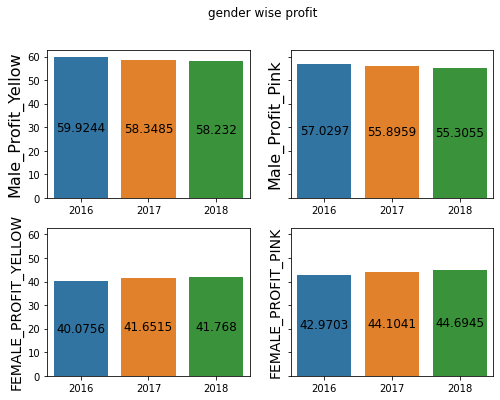

In [47]:
fig,axes = plt.subplots(2, 2, figsize=(8, 6),sharey=True)
fig.suptitle('gender wise profit')
splot = sns.barplot(ax = axes[0,0],x = ['2016','2017','2018'],y = 'Male_Profit_Percentage',data = Male_Profit_Yellow_Year)
splot.set_ylabel("Male_Profit_Yellow", size=16)
splot.bar_label(splot.containers[0],size=12,label_type='center')
splot1 = sns.barplot(ax = axes[0,1],x = ['2016','2017','2018'],y = 'Male_Profit_Percentage',data = Male_Profit_Pink_Year)
splot1.set_ylabel("Male_Profit_Pink", size=16)
splot1.bar_label(splot1.containers[0],size=12,label_type='center')
splot2 = sns.barplot(ax = axes[1,0],x = ['2016','2017','2018'],y = 'Female_Profit_Percentage',data = Female_Profit_Yellow_Year)
splot2.set_ylabel("FEMALE_PROFIT_YELLOW", size=14)
splot2.bar_label(splot2.containers[0],size=12,label_type='center')
splot3 = sns.barplot(ax = axes[1,1],x = ['2016','2017','2018'],y = 'Female_Profit_Percentage',data = Female_Profit_Pink_Year)
splot3.set_ylabel("FEMALE_PROFIT_PINK", size=14)
splot3.bar_label(splot3.containers[0],size=12,label_type='center')
#so from graph we can easily say Profit is not depend on Gender

Profit comparision with Age for Yellow Cab

In [48]:
Profit_Yellow_Age = Yellow_cab[['Age','Profit']]
x = Profit_Yellow_Age['Age']
Profit_Yellow_Age_young = Profit_Yellow_Age[x <= 30]
Profit_Yellow_Age_Old = Profit_Yellow_Age[x >= 50]
Profit_Yellow_Age_Med= Profit_Yellow_Age[(Profit_Yellow_Age['Age'] > 30) & (Profit_Yellow_Age['Age'] <= 50)]
Total_Profit_Yellow_Young = Profit_Yellow_Age_young['Age'].sum()
Total_Profit_Yellow_Med = Profit_Yellow_Age_Med['Age'].sum()
Total_Profit_Yellow_Old = Profit_Yellow_Age_Old['Age'].sum()

In [49]:
Total = (Total_Profit_Yellow_Young+Total_Profit_Yellow_Med +Total_Profit_Yellow_Old )
Profit_Yellow_Young_percentage = (Total_Profit_Yellow_Young/(Total_Profit_Yellow_Young+Total_Profit_Yellow_Med +Total_Profit_Yellow_Old ))*100
Profit_Yellow_Med_percentage = Total_Profit_Yellow_Med/Total*100
Profit_Yellow_Old_percentage = Total_Profit_Yellow_Old/Total*100

Profit comparision with Age for Pink Cab

In [50]:
Profit_Pink_Age = Pink_cab[['Age','Profit']]
x = Profit_Pink_Age['Age']
Profit_Pink_Age_young = Profit_Pink_Age[x <= 30]
Profit_Pink_Age_Old = Profit_Pink_Age[x >= 50]
Profit_Pink_Age_Med= Profit_Pink_Age[(Profit_Pink_Age['Age'] > 30) & (Profit_Pink_Age['Age'] <= 50)]
Total_Profit_Pink_Young = Profit_Pink_Age_young['Age'].sum()
Total_Profit_Pink_Med = Profit_Pink_Age_Med['Age'].sum()
Total_Profit_Pink_Old = Profit_Pink_Age_Old['Age'].sum()

In [51]:
Total = (Total_Profit_Pink_Young+Total_Profit_Pink_Med +Total_Profit_Pink_Old )
Profit_Pink_Young_percentage = (Total_Profit_Pink_Young/(Total_Profit_Pink_Young+Total_Profit_Pink_Med +Total_Profit_Pink_Old ))*100
Profit_Pink_Med_percentage = Total_Profit_Pink_Med/Total*100
Profit_Pink_Old_percentage = Total_Profit_Pink_Old/Total*100

Graph_Visulization

'So_from graph visulization we can say Medium age group Most used cab\neither it is Yellow or Pink'

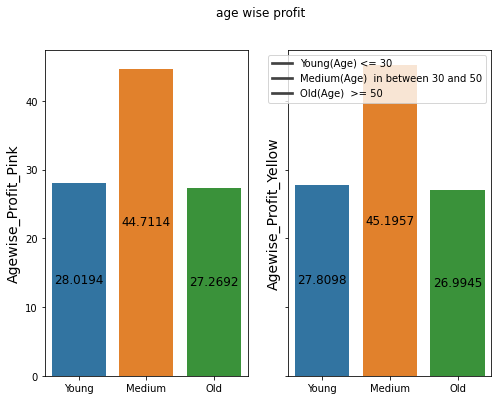

In [53]:
fig,axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('age wise profit')
splot4 = sns.barplot(ax = axes[0],x = ['Young','Medium','Old'],y = [Profit_Pink_Young_percentage,Profit_Pink_Med_percentage,Profit_Pink_Old_percentage])
splot4.set_ylabel("Agewise_Profit_Pink", size=14)
splot4.bar_label(splot4.containers[0],size=12,label_type='center')
splot5 = sns.barplot(ax = axes[1],x = ['Young','Medium','Old'],y = [Profit_Yellow_Young_percentage,Profit_Yellow_Med_percentage,Profit_Yellow_Old_percentage])
splot5.set_ylabel("Agewise_Profit_Yellow", size=14)
splot5.bar_label(splot5.containers[0],size=12,label_type='center')
plt.legend(labels=["Young(Age) <= 30","Medium(Age)  in between 30 and 50",'Old(Age)  >= 50'])
'''So_from graph visulization we can say Medium age group Most used cab
either it is Yellow or Pink'''

Profit comparision with Income

In [54]:
Profit_Yellow_Income = Yellow_cab[['Income (USD/Month)','Profit']]
Profit_Yellow_Poor = Profit_Yellow_Income[Profit_Yellow_Income['Income (USD/Month)'] <= 15000]
Profit_Yellow_Midclass= Profit_Yellow_Income[(Profit_Yellow_Income['Income (USD/Month)'] > 15000) & (Profit_Yellow_Income['Income (USD/Month)'] <25000)]
Profit_Yellow_Rich = Profit_Yellow_Income[Profit_Yellow_Income['Income (USD/Month)'] >= 25000]
Total_Profit_Yellow_Poor = Profit_Yellow_Poor['Income (USD/Month)'].sum()
Total_Profit_Yellow_Midclass = Profit_Yellow_Midclass['Income (USD/Month)'].sum()
Total_Profit_Yellow_Rich = Profit_Yellow_Rich['Income (USD/Month)'].sum()

In [55]:
Total1 = Total_Profit_Yellow_Poor+Total_Profit_Yellow_Midclass+Total_Profit_Yellow_Rich
Profit_Yellow_Poor_Percentage = Total_Profit_Yellow_Poor/Total1 * 100
Profit_Yellow_Midclass_Percentage = Total_Profit_Yellow_Midclass/Total1 *100
Profit_Yellow_Rich_Percentage = Total_Profit_Yellow_Rich/Total1 * 100

Profit comparision with Income

In [56]:
Profit_Pink_Income = Pink_cab[['Income (USD/Month)','Profit']]
Profit_Pink_Poor = Profit_Pink_Income[Profit_Pink_Income['Income (USD/Month)'] <= 15000]
Profit_Pink_Midclass= Profit_Pink_Income[(Profit_Pink_Income['Income (USD/Month)'] > 15000) & (Profit_Pink_Income['Income (USD/Month)'] <25000)]
Profit_Pink_Rich = Profit_Pink_Income[Profit_Pink_Income['Income (USD/Month)'] >= 25000]
Total_Profit_Pink_Poor = Profit_Pink_Poor['Income (USD/Month)'].sum()
Total_Profit_Pink_Midclass = Profit_Pink_Midclass['Income (USD/Month)'].sum()
Total_Profit_Pink_Rich = Profit_Pink_Rich['Income (USD/Month)'].sum()

In [57]:
Total2 = Total_Profit_Pink_Poor+Total_Profit_Pink_Midclass+Total_Profit_Pink_Rich
Profit_Pink_Poor_Percentage = Total_Profit_Pink_Poor/Total2 * 100
Profit_Pink_Midclass_Percentage = Total_Profit_Pink_Midclass/Total2 *100
Profit_Pink_Rich_Percentage = Total_Profit_Pink_Rich/Total2 * 100

Graph_Visulization

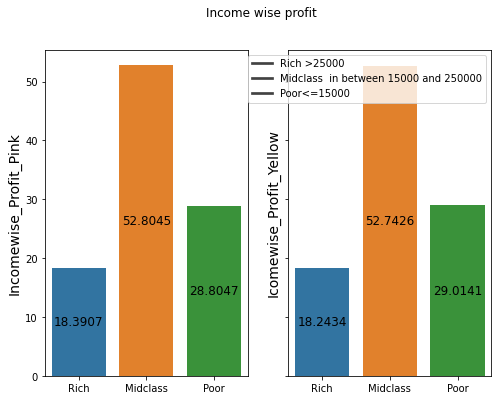

In [59]:
fig,axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Income wise profit')
splot6 = sns.barplot(ax = axes[0],x = ['Rich','Midclass','Poor'],y = [Profit_Pink_Rich_Percentage,Profit_Pink_Midclass_Percentage,Profit_Pink_Poor_Percentage])
splot6.set_ylabel("Incomewise_Profit_Pink", size=14)
splot6.bar_label(splot6.containers[0],size=12,label_type='center')
splot7= sns.barplot(ax = axes[1],x = ['Rich','Midclass','Poor'],y = [Profit_Yellow_Rich_Percentage,Profit_Yellow_Midclass_Percentage,Profit_Yellow_Poor_Percentage])
splot7.set_ylabel("Icomewise_Profit_Yellow", size=14)
splot7.bar_label(splot7.containers[0],size=12,label_type='center')
plt.legend(labels=["Rich >25000","Midclass  in between 15000 and 250000",'Poor<=15000'])


So_from graph visulization we can say Mid_class group Most used cab<br>
ther it is Yellow or Pink


[Text(0, 0, '10.7593'), Text(0, 0, '89.2407')]

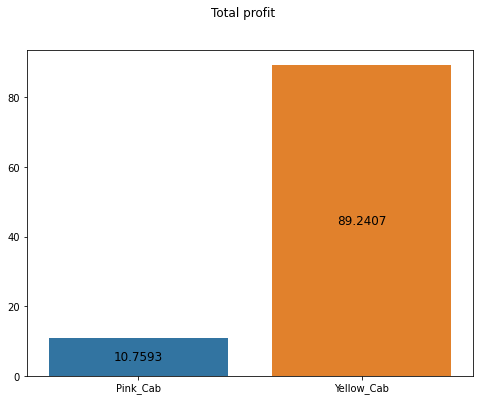

In [60]:
Total_Profit_Percentage = Total_profit_Pink_cab + Total_profit_yellow_cab
#Total Profit comparison of Yellow cab and pink cab
fig,axes = plt.subplots(1, 1, figsize=(8, 6), sharey=True)
fig.suptitle('Total profit')
splot8 = sns.barplot(data=Data, x=['Pink_Cab','Yellow_Cab'], y=[Total_profit_Pink_cab/Total_Profit_Percentage*100,Total_profit_yellow_cab/Total_Profit_Percentage*100])
splot8.bar_label(splot8.containers[0],size=12,label_type='center')
#From the Graph we can easily say Yellow_Cab has 9 time more profit than Pink_Cab
#From the Graph we can easily say Yellow_Cab has 9 time more profit than Pink_Cab

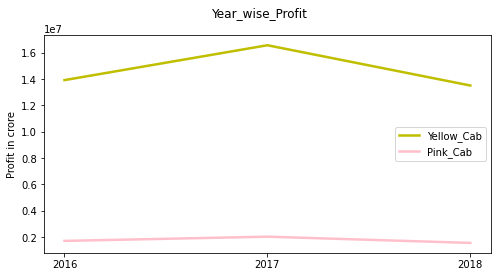

In [61]:
fig,axes = plt.subplots(1, 1, figsize=(8, 4), sharey=True)
fig.suptitle('Year_wise_Profit')
splot9 = sns.lineplot(data = Profit_per_year_Yellow_Cab, x=['2016','2017','2018'], y = 'Profit',color = 'y', linewidth=2.5,legend="auto",label = 'Yellow_Cab').set_ylabel('Profit in crore')
splot9 = sns.lineplot(data = Profit_per_year_Pink_Cab, x=['2016','2017','2018'], y = 'Profit',color = 'pink', linewidth=2.5,legend="auto",label = 'Pink_Cab', )

From This Visulisation and Analysis we can simply say client must have to Invest in Yellow cab company.